In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data= pd.read_csv('Enrollments.csv')
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6509 entries, 0 to 6508
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  4392 non-null   object 
 1   Parent name                4817 non-null   object 
 2   Child Name                 4817 non-null   object 
 3   Age                        4814 non-null   float64
 4   Communication Preference   3249 non-null   object 
 5   Teacher Name               4784 non-null   object 
 6   Source                     4807 non-null   object 
 7   Source details             3750 non-null   object 
 8   Class ID                   4783 non-null   object 
 9   Type                       4783 non-null   object 
 10  Class name                 4783 non-null   object 
 11  Date                       4782 non-null   object 
 12  Day                        4783 non-null   object 
 13  Start time (in PST)        4783 non-null   objec

(  Timestamp Parent name Child Name   Age Communication Preference  \
 0       NaN    Raphaela       Elsa   9.0                      NaN   
 1       NaN    Raphaela       Elsa   9.0                      NaN   
 2       NaN      Swetha     Vivaan   7.0                      NaN   
 3       NaN      Swetha     Vivaan   7.0                      NaN   
 4       NaN    Raphaela        Ana  13.0                      NaN   
 
         Teacher Name              Source Source details Class ID     Type  \
 0  Clark Vandeventer  Friends and Family            NaN        7  Onetime   
 1     Nicole Pauling  Friends and Family            NaN       14  Onetime   
 2      Bill Thompson  Friends and Family            NaN       18  Onetime   
 3  Clark Vandeventer  Friends and Family            NaN       19  Onetime   
 4  Clark Vandeventer  Friends and Family            NaN       11  Onetime   
 
    ... Score - Another class  Yes Maybe   No Final score  \
 0  ...                   0.0  0.0   0.0  0.0  

In [3]:
data_cleaned = data.drop(data.columns[35:38], axis=1)

data_cleaned = data_cleaned.dropna(subset=["Teacher Name", "Class name", "Final score"])

data_cleaned["Date"] = pd.to_datetime(data_cleaned["Date"], errors="coerce")
data_cleaned["Start time (in PST)"] = pd.to_datetime(data_cleaned["Start time (in PST)"], errors="coerce")
data_cleaned["End time (in PST)"] = pd.to_datetime(data_cleaned["End time (in PST)"], errors="coerce")

data_cleaned["Country"].fillna("Unknown", inplace=True)
data_cleaned["Region"].fillna("Unknown", inplace=True)
data_cleaned["Timezone"].fillna("Unknown", inplace=True)
data_cleaned["Want another slot"].fillna("No Response", inplace=True)

data_cleaned.info(), data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Index: 4775 entries, 0 to 4816
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  4351 non-null   object        
 1   Parent name                4775 non-null   object        
 2   Child Name                 4775 non-null   object        
 3   Age                        4773 non-null   float64       
 4   Communication Preference   3212 non-null   object        
 5   Teacher Name               4775 non-null   object        
 6   Source                     4767 non-null   object        
 7   Source details             3722 non-null   object        
 8   Class ID                   4775 non-null   object        
 9   Type                       4775 non-null   object        
 10  Class name                 4775 non-null   object        
 11  Date                       0 non-null      datetime64[ns]
 12  Day        

C:\Users\akank\AppData\Local\Temp\ipykernel_10880\3295308433.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned["Date"] = pd.to_datetime(data_cleaned["Date"], errors="coerce")
C:\Users\akank\AppData\Local\Temp\ipykernel_10880\3295308433.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned["Start time (in PST)"] = pd.to_datetime(data_cleaned["Start time (in PST)"], errors="coerce")
C:\Users\akank\AppData\Local\Temp\ipykernel_10880\3295308433.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

(None,
   Timestamp Parent name Child Name   Age Communication Preference  \
 0       NaN    Raphaela       Elsa   9.0                      NaN   
 1       NaN    Raphaela       Elsa   9.0                      NaN   
 2       NaN      Swetha     Vivaan   7.0                      NaN   
 3       NaN      Swetha     Vivaan   7.0                      NaN   
 4       NaN    Raphaela        Ana  13.0                      NaN   
 
         Teacher Name              Source Source details Class ID     Type  \
 0  Clark Vandeventer  Friends and Family            NaN        7  Onetime   
 1     Nicole Pauling  Friends and Family            NaN       14  Onetime   
 2      Bill Thompson  Friends and Family            NaN       18  Onetime   
 3  Clark Vandeventer  Friends and Family            NaN       19  Onetime   
 4  Clark Vandeventer  Friends and Family            NaN       11  Onetime   
 
    ... Another class Score - Concept Score - Interesting  \
 0  ...           NaN             0.0   

In [4]:
attendance_summary = data_cleaned["Attended?"].value_counts()

feedback_summary = data_cleaned[["Score - Concept", "Score - Interesting", "Score - Another class", "Final score"]].describe()

timezone_distribution = data_cleaned["Timezone"].value_counts()
start_time_distribution = data_cleaned["Start time (in PST)"].dt.hour.value_counts()

attendance_summary, feedback_summary, timezone_distribution.head(), start_time_distribution.head()


(Attended?
 No                 2125
 Yes                1491
 Duplicate entry     328
 Not Applicable      244
 Class cancelled     201
 Unenrolled          175
 Extra lisiting       57
 No data               6
 Name: count, dtype: int64,
        Score - Concept  Score - Interesting  Score - Another class  \
 count      4571.000000          4571.000000            4570.000000   
 mean          0.613214             0.611245               0.594092   
 std           1.186739             1.184157               1.161131   
 min           0.000000             0.000000               0.000000   
 25%           0.000000             0.000000               0.000000   
 50%           0.000000             0.000000               0.000000   
 75%           0.000000             0.000000               0.000000   
 max           3.000000             3.000000               3.000000   
 
        Final score  
 count  4775.000000  
 mean      1.740733  
 std       3.447889  
 min       0.000000  
 25%      

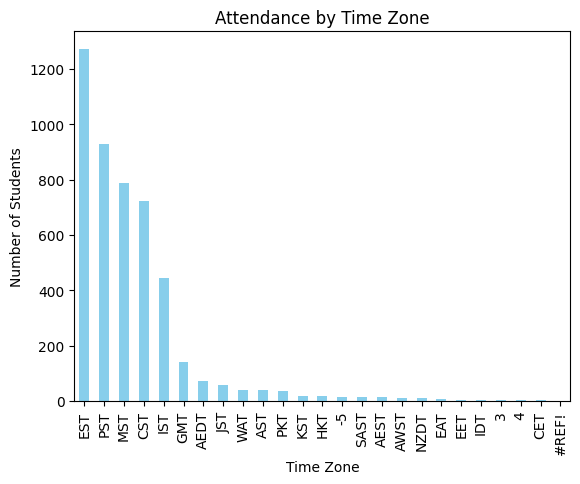

In [22]:
attendance_by_timezone = data['Timezone'].value_counts()

attendance_by_timezone.plot(kind='bar', color='skyblue')
plt.title('Attendance by Time Zone')
plt.xlabel('Time Zone')
plt.ylabel('Number of Students')

plt.show()



Top 5 Performing Teachers:
                      Score - Concept  Score - Interesting  \
Teacher Name                                                
Mary Daniels                1.187500             1.250000   
Melissa Peterson            0.878788             0.909091   
Rae Wilson                  0.824675             0.837662   
Dana Lorelle                0.844358             0.821012   
Marcos Del Cogliano         0.851852             0.851852   

                     Score - Another class  Final score  
Teacher Name                                             
Mary Daniels                      1.250000     3.687500  
Melissa Peterson                  0.878788     2.588235  
Rae Wilson                        0.818182     2.480519  
Dana Lorelle                      0.801556     2.466926  
Marcos Del Cogliano               0.666667     2.370370  

Top 5 Performing Classes:
                                                     Score - Concept  \
Class name                             

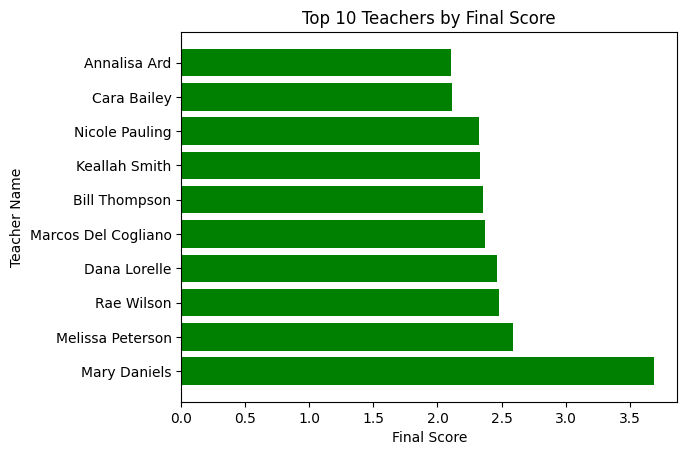

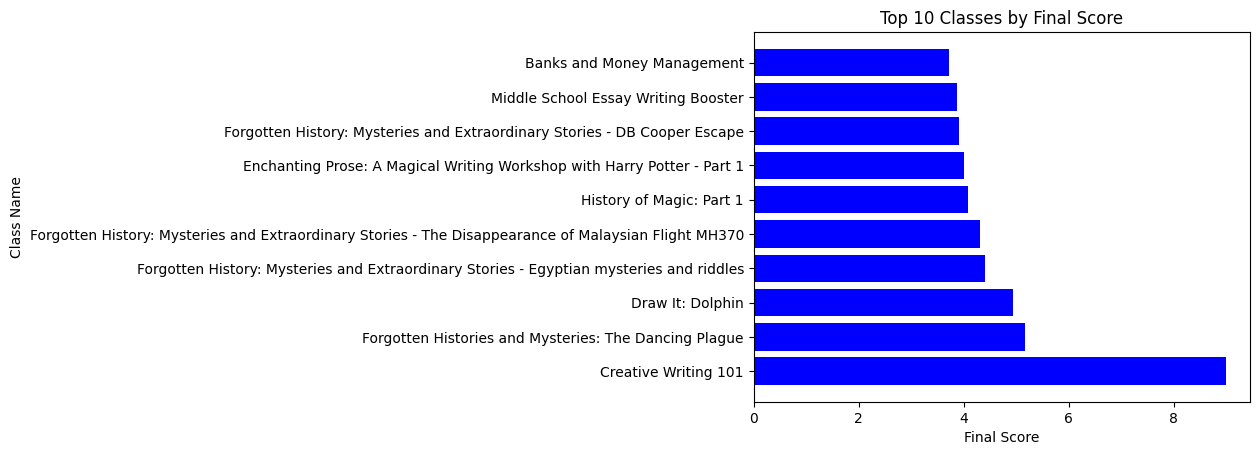

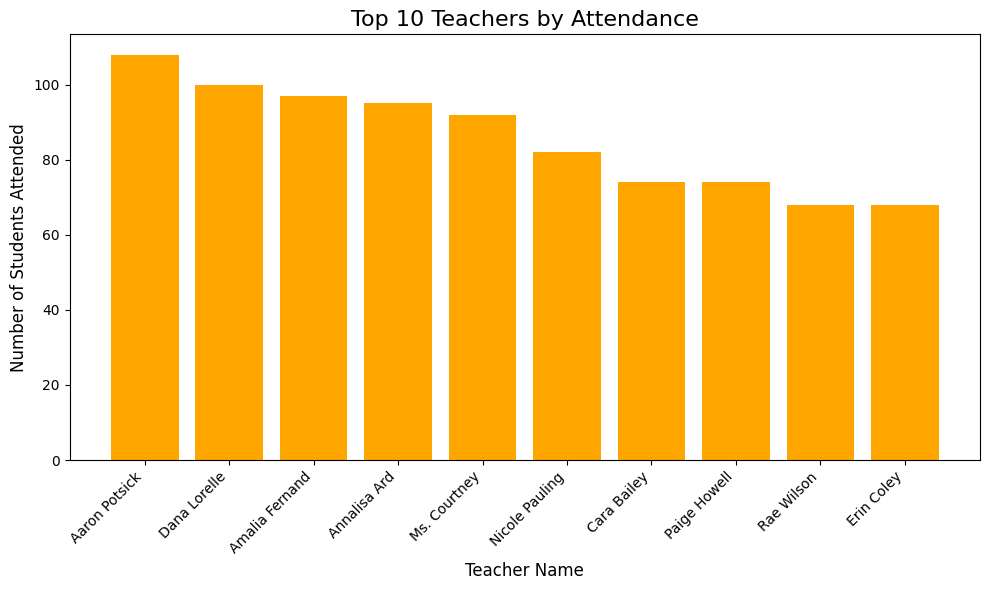

In [ ]:
teacher_performance = data_cleaned.groupby("Teacher Name")[
    ["Score - Concept", "Score - Interesting", "Score - Another class", "Final score"]
].mean().sort_values(by="Final score", ascending=False)

class_performance = data_cleaned.groupby("Class name")[
    ["Score - Concept", "Score - Interesting", "Score - Another class", "Final score"]
].mean().sort_values(by="Final score", ascending=False)

top_teachers = teacher_performance.head()
top_classes = class_performance.head()

print("Top 5 Performing Teachers:\n", top_teachers)
print("\nTop 5 Performing Classes:\n", top_classes)

plt.barh(teacher_performance.head(10).index, teacher_performance.head(10)["Final score"], color="green")
plt.title("Top 10 Teachers by Final Score")
plt.xlabel("Final Score")
plt.ylabel("Teacher Name")
plt.show()

plt.barh(class_performance.head(10).index, class_performance.head(10)["Final score"], color="blue")
plt.title("Top 10 Classes by Final Score")
plt.xlabel("Final Score")
plt.ylabel("Class Name")
plt.show()

teacher_attendance = data_cleaned.groupby("Teacher Name")["Attended?"].value_counts().unstack(fill_value=0)
teacher_performance = teacher_performance.merge(teacher_attendance["Yes"], left_index=True, right_index=True)

top_10_attendance = teacher_attendance["Yes"].sort_values(ascending=False).head(10)
plt.bar(top_10_attendance.index, top_10_attendance.values, color="orange")
plt.title("Top 10 Teachers by Attendance")
plt.xlabel("Teacher Name")
plt.ylabel("Number of Students Attended")
plt.show()
